In [1]:
import os
import cv2
import pickle
import shutil
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from tqdm import tqdm

In [20]:
sample_index = 14

paths = [{
    "styled_img_path": f"/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-027/diffgen-2025-06-29-03-16/styled_samples_288x256x256x4.pkl",
    "masked_images_folder_path": '/home/miguel/GI/0 - Data Exploration & Analysis/GI-Roberta/gi-roberta-dataset/full_dataset'
}, {
    "styled_img_path": f'/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-032/diffgen-2025-07-08-08-03/styled_samples_3x256x256x4.pkl',
    "masked_images_folder_path": '/home/miguel/GI/0 - Data Exploration & Analysis/GI-Roberta/gi-roberta-dataset/full_dataset'
}, {
    "styled_img_path": '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-032/diffgen-2025-07-08-21-16/styled_samples_75x256x256x4.pkl',
    "masked_images_folder_path": '/home/miguel/GI/0 - Data Exploration & Analysis/GI-Roberta/gi-roberta-dataset/full_dataset'
}, {
    "styled_img_path": '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-032/diffgen-2025-07-08-21-16/styled_samples_183x256x256x4.pkl',
    "masked_images_folder_path": '/home/miguel/GI/0 - Data Exploration & Analysis/GI-Roberta/gi-roberta-dataset/full_dataset'
}, {
    'styled_img_path': '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-027/diffgen-2025-07-09-13-50/styled_samples_183x256x256x4.pkl',
    'masked_images_folder_path': '/home/miguel/GI/0 - Data Exploration & Analysis/GI-Roberta/gi-roberta-dataset/full_dataset'
},{
    "styled_img_path": '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-027/diffgen-2025-07-12-00-38/styled_samples_183x256x256x4.pkl',
    'masked_images_folder_path': '/home/miguel/GI/0 - Data Exploration & Analysis/GI-Roberta/gi-roberta-dataset/full_dataset'
},

{
    "styled_img_path": f"/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-027/diffgen-2025-07-12-00-38/styled_samples_183x256x256x4.pkl",
    'masked_images_folder_path': '/home/miguel/GI/0 - Data Exploration & Analysis/GI-Roberta/gi-roberta-dataset/full_dataset'
}, {
    "styled_img_path": f'/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-029/diffgen-2025-07-12-03-48/styled_samples_185x256x256x4.pkl',
    'masked_images_folder_path': '/home/miguel/GI/0 - Data Exploration & Analysis/GI-Roberta/gi-roberta-dataset/full_dataset'
}, {
    "styled_img_path": '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-030/diffgen-2025-07-12-00-38/styled_samples_189x256x256x4.pkl',
    'masked_images_folder_path': '/home/miguel/GI/0 - Data Exploration & Analysis/GI-Roberta/gi-roberta-dataset/full_dataset'
}, {
    "styled_img_path": '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-031/diffgen-2025-07-12-03-56/styled_samples_180x256x256x4.pkl',
    'masked_images_folder_path': '/home/miguel/GI/0 - Data Exploration & Analysis/GI-Roberta/gi-roberta-dataset/full_dataset'
}, {
    'styled_img_path': '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-032/diffgen-2025-07-12-07-05/styled_samples_183x256x256x4.pkl',
    'masked_images_folder_path': '/home/miguel/GI/0 - Data Exploration & Analysis/GI-Roberta/gi-roberta-dataset/full_dataset'
},
{
    'styled_img_path': '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-027/diffgen-2025-07-13-00-48/styled_samples_2x256x256x4.pkl',
    'masked_images_folder_path': '/home/miguel/GI/0 - Data Exploration & Analysis/GI-Roberta/gi-roberta-dataset/full_dataset'
},

{
    'styled_img_path': '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-029/diffgen-2025-07-13-07-47/styled_samples_532x256x256x4.pkl',
    'masked_images_folder_path': '/home/miguel/GI/0 - Data Exploration & Analysis/GI-Roberta/gi-roberta-dataset/full_dataset'
},
{
    'styled_img_path': '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-027/diffgen-2025-07-13-00-54/styled_samples_400x256x256x4.pkl',
    'masked_images_folder_path': '/home/miguel/GI/0 - Data Exploration & Analysis/GI-Roberta/gi-roberta-dataset/full_dataset'
},
{
    'styled_img_path': '/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-031/diffgen-2025-07-13-17-25/styled_samples_430x256x256x4.pkl',
    'masked_images_folder_path': '/home/miguel/GI/0 - Data Exploration & Analysis/GI-Roberta/gi-roberta-dataset/full_dataset'
}
]

styled_img_path, masked_images_folder_path = paths[sample_index]["styled_img_path"], paths[sample_index]["masked_images_folder_path"]

shape = (256, 256)

In [21]:
styled_img_path

'/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/image_samples_FD-031/diffgen-2025-07-13-17-25/styled_samples_430x256x256x4.pkl'

In [52]:
with open(styled_img_path, "rb") as f:
    styled_images = pickle.load(f)

export_path_nonzero_masks = 'nonzero_masks'
export_path_zero_masks = 'zero_masks'
export_path_low_ssim = 'low_ssim'
export_path_high_ssim = 'high_ssim'
export_path_limited_mask = 'limited_masks'

shutil.rmtree(export_path_low_ssim, ignore_errors=True)
os.makedirs(export_path_low_ssim, exist_ok=True)

shutil.rmtree(export_path_nonzero_masks, ignore_errors=True)
os.makedirs(export_path_nonzero_masks, exist_ok=True)

shutil.rmtree(export_path_high_ssim, ignore_errors=True)
os.makedirs(export_path_high_ssim, exist_ok=True)

shutil.rmtree(export_path_limited_mask, ignore_errors=True)
os.makedirs(export_path_limited_mask, exist_ok=True)

In [53]:
count = 0
for img_list in styled_images.values():
    for img in img_list:
        count += 1

In [54]:
filename_images = {}
filename_masks = {}
masked_images = os.listdir(masked_images_folder_path)

for filename in masked_images:
    if not filename.endswith('.png') and not filename.endswith('.jpg'):
        continue
        
    img_path = os.path.join(masked_images_folder_path, filename)
    mask_path = os.path.join(masked_images_folder_path, filename.replace('-image', '-mask'))

    image = Image.open(img_path)
    mask = Image.open(mask_path)

    filename_images[filename] = image
    filename_masks[filename] = mask

# Clear the export path directories if they exists
if os.path.exists(export_path_nonzero_masks):
    shutil.rmtree(export_path_nonzero_masks)

os.makedirs(export_path_nonzero_masks, exist_ok=True)

if os.path.exists(export_path_zero_masks):
    shutil.rmtree(export_path_zero_masks)
    

os.makedirs(export_path_zero_masks, exist_ok=True)

In [55]:
shutil.rmtree(export_path_high_ssim)
os.makedirs(export_path_high_ssim, exist_ok=True)

shutil.rmtree(export_path_low_ssim)
os.makedirs(export_path_low_ssim, exist_ok=True)

shutil.rmtree(export_path_limited_mask)
os.makedirs(export_path_limited_mask, exist_ok=True)

In [56]:
from skimage.metrics import structural_similarity as ssim

In [26]:
import cv2
import numpy as np

def is_cohesive_mask(mask_gray: np.ndarray,
                     thresh_method: str = 'otsu',
                     min_area: int = 50,
                     main_frac_thresh: float = 0.6,
                     max_extra_components: int = 1) -> bool:
    """
    Decide whether a grayscale mask is coherent (one big region) or incohesive
    (many small regions).

    Parameters
    ----------
    mask_gray : np.ndarray
        2D array, single-channel mask (uint8 or float in [0,1]).
    thresh_method : str
        'otsu' | 'adaptive' | 'fixed' — how to binarize.
    min_area : int
        Ignore components smaller than this (noise filter).
    main_frac_thresh : float
        Fraction of total mask area the largest component must exceed to be
        considered dominant.
    max_extra_components : int
        Allow at most this many additional (filtered) components.

    Returns
    -------
    bool
        True if “coherent” (one dominant region), False otherwise.
    """
    # ——— ensure uint8 [0,255] ———
    if mask_gray.dtype == np.float32 or mask_gray.dtype == np.float64:
        img = (mask_gray * 255).astype(np.uint8)
    else:
        img = mask_gray.astype(np.uint8)

    # ——— binarize ———
    if thresh_method == 'otsu':
        _, bw = cv2.threshold(img, 0, 255,
                              cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    elif thresh_method == 'adaptive':
        bw = cv2.adaptiveThreshold(img, 255,
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY,
                                   blockSize=11, C=2)
    else:  # 'fixed'
        _, bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # ——— connected components ———
    n_labels, labels, stats, _ = cv2.connectedComponentsWithStats(bw,
                                                                  connectivity=8)
    # stats[:, cv2.CC_STAT_AREA] is pixel-area for each label;
    # skip label 0 (background)
    areas = stats[1:, cv2.CC_STAT_AREA]

    # ——— filter out tiny noise blobs ———
    areas = areas[areas >= min_area]
    if areas.size == 0:
        return False

    total = areas.sum()
    largest = areas.max()
    extras = areas.size - 1

    # ——— decision ———
    # coherent if one blob covers ≥ main_frac_thresh of all mask pixels,
    # and there are at most max_extra_components others
    if (largest / total) >= main_frac_thresh and extras <= max_extra_components:
        return True
    else:
        return False

In [27]:
styled_images

{'/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/guided_diffusion/segmented-images-roberta-hq-masks/FD-031/masked-images/FD-027-slice-13-image.png': array([[[[ 23,  23,  23, 110],
          [ 22,  22,  22, 121],
          [ 29,  29,  29, 126],
          ...,
          [ 25,  25,  25, 118],
          [ 22,  22,  22, 119],
          [ 13,  13,  13, 109]],
 
         [[ 23,  23,  23, 122],
          [ 26,  26,  26, 133],
          [ 23,  23,  23, 133],
          ...,
          [ 26,  26,  26, 134],
          [ 28,  28,  28, 133],
          [ 29,  29,  29, 116]],
 
         [[ 18,  18,  18, 126],
          [ 28,  28,  28, 136],
          [ 22,  22,  22, 134],
          ...,
          [ 29,  29,  29, 132],
          [ 25,  25,  25, 138],
          [ 24,  24,  24, 126]],
 
         ...,
 
         [[ 28,  28,  28, 127],
          [ 23,  23,  23, 139],
          [ 17,  17,  17, 132],
          ...,
          [ 23,  23,  23, 134],
          [ 24,  24,  24, 135],
      

  2%|▏         | 1/43 [00:05<03:34,  5.11s/it]


KeyboardInterrupt: 

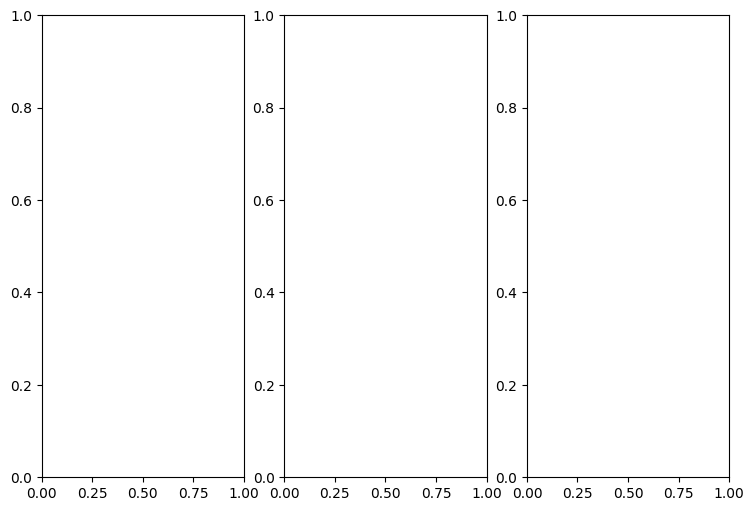

In [58]:
num_nonzero_masks = 0
num_masks = 0

mask_min = 0
mask_max = 0

num_limited_masks = 0

ssim_values = []

original_images = []
synthetic_images = []

HIGH_SSIM_THRESHOLD = 0.2
LOW_SSIM_THRESHOLD = 0.1


for key, styled_list in tqdm(styled_images.items()):
    # styled_image = styled_list[0]
    for styled_image in styled_list:
        # Split synthetic image and mask
        synthetic_img = styled_image[:, :, :3].astype(np.uint8)
        synthetic_gray = cv2.cvtColor(np.asarray(synthetic_img), cv2.COLOR_RGB2GRAY)

        mask = styled_image[:, :, 3]

        mask_min = min(mask_min, mask.flatten().min())
        mask_max = max(mask_max, mask.flatten().max())

        mask_normalized = mask / 255.0  # Normalize to [0,1] for transparency
        
        filename = key.split('/')[-1]  # Extract filename

        original_image = filename_images.get(filename, None)
        if original_image is None:
            print(f"Warning: No original image found for {filename}. Skipping.")
            continue

        original_mask = filename_masks.get(filename, None)
        if original_mask is None:
            print(f"Warning: No original mask found for {filename}. Skipping.")
            continue
        
        has_mask = mask_normalized.flatten().sum() > 5
        if has_mask:
            num_nonzero_masks += 1
        num_masks += 1

        export_path = export_path_nonzero_masks if has_mask else export_path_zero_masks

        ssim_value = ssim(
            np.array(original_image),
            synthetic_gray,
            full=True
        )[0]
        ssim_values.append(ssim_value)

        export_paths = [export_path]

        if (ssim_value > HIGH_SSIM_THRESHOLD):
            export_paths.append(export_path_high_ssim)

        elif (ssim_value < LOW_SSIM_THRESHOLD):
            export_paths.append(export_path_low_ssim)
        
        mask_bool = mask > 200
        percent_mask_highlighted = np.sum(mask_bool) / mask_bool.size 
        if percent_mask_highlighted < 0.5 and is_cohesive_mask(mask_normalized, thresh_method='otsu', min_area=50, main_frac_thresh=0.6, max_extra_components=1):
            export_paths.append(export_path_limited_mask)

        for path in export_paths:
            # Save original synthetic image
            orig_filename = os.path.join(path, f"{filename}_synthetic.png")
            cv2.imwrite(orig_filename, cv2.cvtColor(synthetic_img, cv2.COLOR_RGB2BGR))

            # Save the raw mask
            mask_filename = os.path.join(path, f"{filename}_synthetic_mask.png")
            cv2.imwrite(mask_filename, (mask_normalized * 255).astype(np.uint8))
            num_limited_masks+= 1

        # Create and save the overlay
        fig, axes = plt.subplots(1, 4, figsize=(12, 6))
        axes[0].imshow(synthetic_img)
        axes[0].set_title(f"Synthetic: {filename} - SSIM {ssim_value:.4f}")
        axes[0].axis('off')

        axes[1].imshow(synthetic_img)
        axes[1].imshow(mask_normalized, cmap='jet', alpha=0.5)
        axes[1].set_title(f"Synthetic + Mask Overlay: {filename}")
        axes[1].axis('off')
        
        axes[2].imshow(original_image)
        axes[2].set_title(f"Original: {filename}")
        axes[2].axis('off')

        axes[3].imshow(original_image)
        axes[3].imshow(original_mask, cmap='jet', alpha=0.5)
        axes[3].set_title(f"Original + Mask Overlay: {filename}")
        axes[3].axis('off')

        overlay_filename = os.path.join(export_path, f"{filename}_overlay.png")
        plt.tight_layout()
        plt.savefig(overlay_filename, bbox_inches='tight')
        plt.close(fig)

            


        # Convert original and synthetic gray images to RGB
        original_image = cv2.cvtColor(np.array(original_image), cv2.COLOR_GRAY2RGB)
        synthetic_gray = cv2.cvtColor(synthetic_gray, cv2.COLOR_GRAY2RGB)

        original_images.append(original_image)
        synthetic_images.append(synthetic_gray)

In [17]:
os.makedirs(export_path_low_ssim, exist_ok=True)

In [61]:
len(os.listdir('/home/miguel/GI/1.5 - Synthetic Data Generation/diffuse-gen/diffuse-gen/testing_notebooks/limited_masks'))

66

In [12]:
ssim_values_all =np.array(ssim_values)

In [ ]:

synthetic_gray = cv2.cvtColor(np.asarray(synthetic_img), cv2.COLOR_RGB2GRAY)

In [62]:

mask_bool = synthetic_gray > 50
percent_mask_highlighted = np.sum(mask_bool) / mask_bool.size 

In [17]:
len(ssim_values_all[ssim_values_all > 0.2]) / len(ssim_values_all)

0.07103825136612021

In [31]:
original_images[0].shape

(256, 256)

In [ ]:
# Compute Frechet Inception Distance

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms
from scipy.linalg import sqrtm
import numpy as np

# 1) Preprocessing: resize to 299×299, convert to tensor, normalize like Inception expects
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# 2) Load Inception v3 (pretrained) and strip off the final fc so it returns 2048‐d features
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
inception = models.inception_v3(pretrained=True, transform_input=False)
inception.fc = nn.Identity()
inception.eval().to(device)

def get_activations(images, model, batch_size=32):
    """
    images: list of H×W×3 uint8 RGB NumPy arrays
    returns: N×2048 array of features
    """
    acts = []
    with torch.no_grad():
        for i in range(0, len(images), batch_size):
            batch = images[i:i+batch_size]
            # preprocess each image
            batch_t = torch.stack([preprocess(img) for img in batch]).to(device)
            feat = model(batch_t)                 # shape [B,2048]
            acts.append(feat.cpu().numpy())
    return np.concatenate(acts, axis=0)

def calculate_fid(orig_imgs, synth_imgs):
    # 1) Extract activations
    act1 = get_activations(orig_imgs, inception)
    act2 = get_activations(synth_imgs, inception)

    # 2) Compute mean & covariance
    mu1, sigma1 = act1.mean(axis=0), np.cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), np.cov(act2, rowvar=False)

    # 3) Compute Frechet distance
    diff = mu1 - mu2
    covmean, _ = sqrtm(sigma1.dot(sigma2), disp=False)
    if np.iscomplexobj(covmean):
        covmean = covmean.real  # numerical fix

    fid = diff.dot(diff) + np.trace(sigma1 + sigma2 - 2 * covmean)
    return fid


In [37]:
fid_score = calculate_fid(original_images, synthetic_images)
print(f"→ Frechet Inception Distance: {fid_score:.4f}")

→ Frechet Inception Distance: 172.3221


In [26]:
synthetic_images[0].shape

(256, 256, 3)

In [ ]:
synthetic_gray = cv2.cvtColor(np.asarray(synthetic_img), cv2.COLOR_RGB2GRAY)


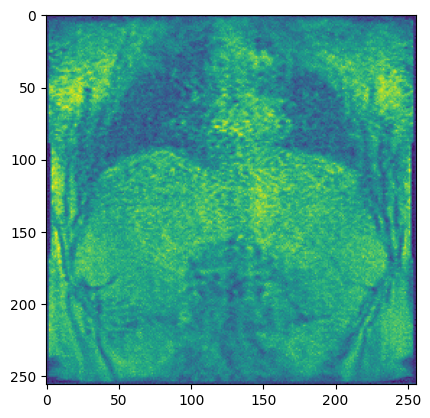

In [24]:
plt.imshow(synthetic_gray)